# Tecnológico de Costa Rica
## Programa de Ciencia de Datos
### Prof. Felipe Meza Obando,

#### Aprendizaje automático (4B)
#### Tarea-4

--- 
Medio de entrega: Link de GitHub

Entregables: Un archivo jupyter ( .IPYNB ). 

Modo de trabajo: Parejas:
Estudiantes:

Yu Hung Yeh Chai

José Alberto Raygada Agüero

---

El objetivo de la Tarea 4 consiste en elegir un conjunto de datos de mediana complejidad que no sea trivial (es decir, que permita alcanzar las actividades de la tarea), y aplicarle el algoritmo de Red Neuronal Artificial (Artificial Neural Network, ANN):

---

## Qué es una Red Neuronal Artificial

Una Red neuronal artificial (Artificial neural networks, ANN) es un modelo de Aprendizaje Automático inspirado en las redes de neuronas biológicas que se encuentran en nuestro cerebro.

Las neuronas presentan unas características morfológicas típicas que sustentan sus funciones: un **cuerpo celular**, llamado soma; una o varias prolongaciones cortas que generalmente transmiten impulsos hacia el soma celular, denominadas **dendritas**; y una prolongación larga, denominada **axón**, que conduce los impulsos desde el soma hacia otra neurona (ver la siguiente figura).

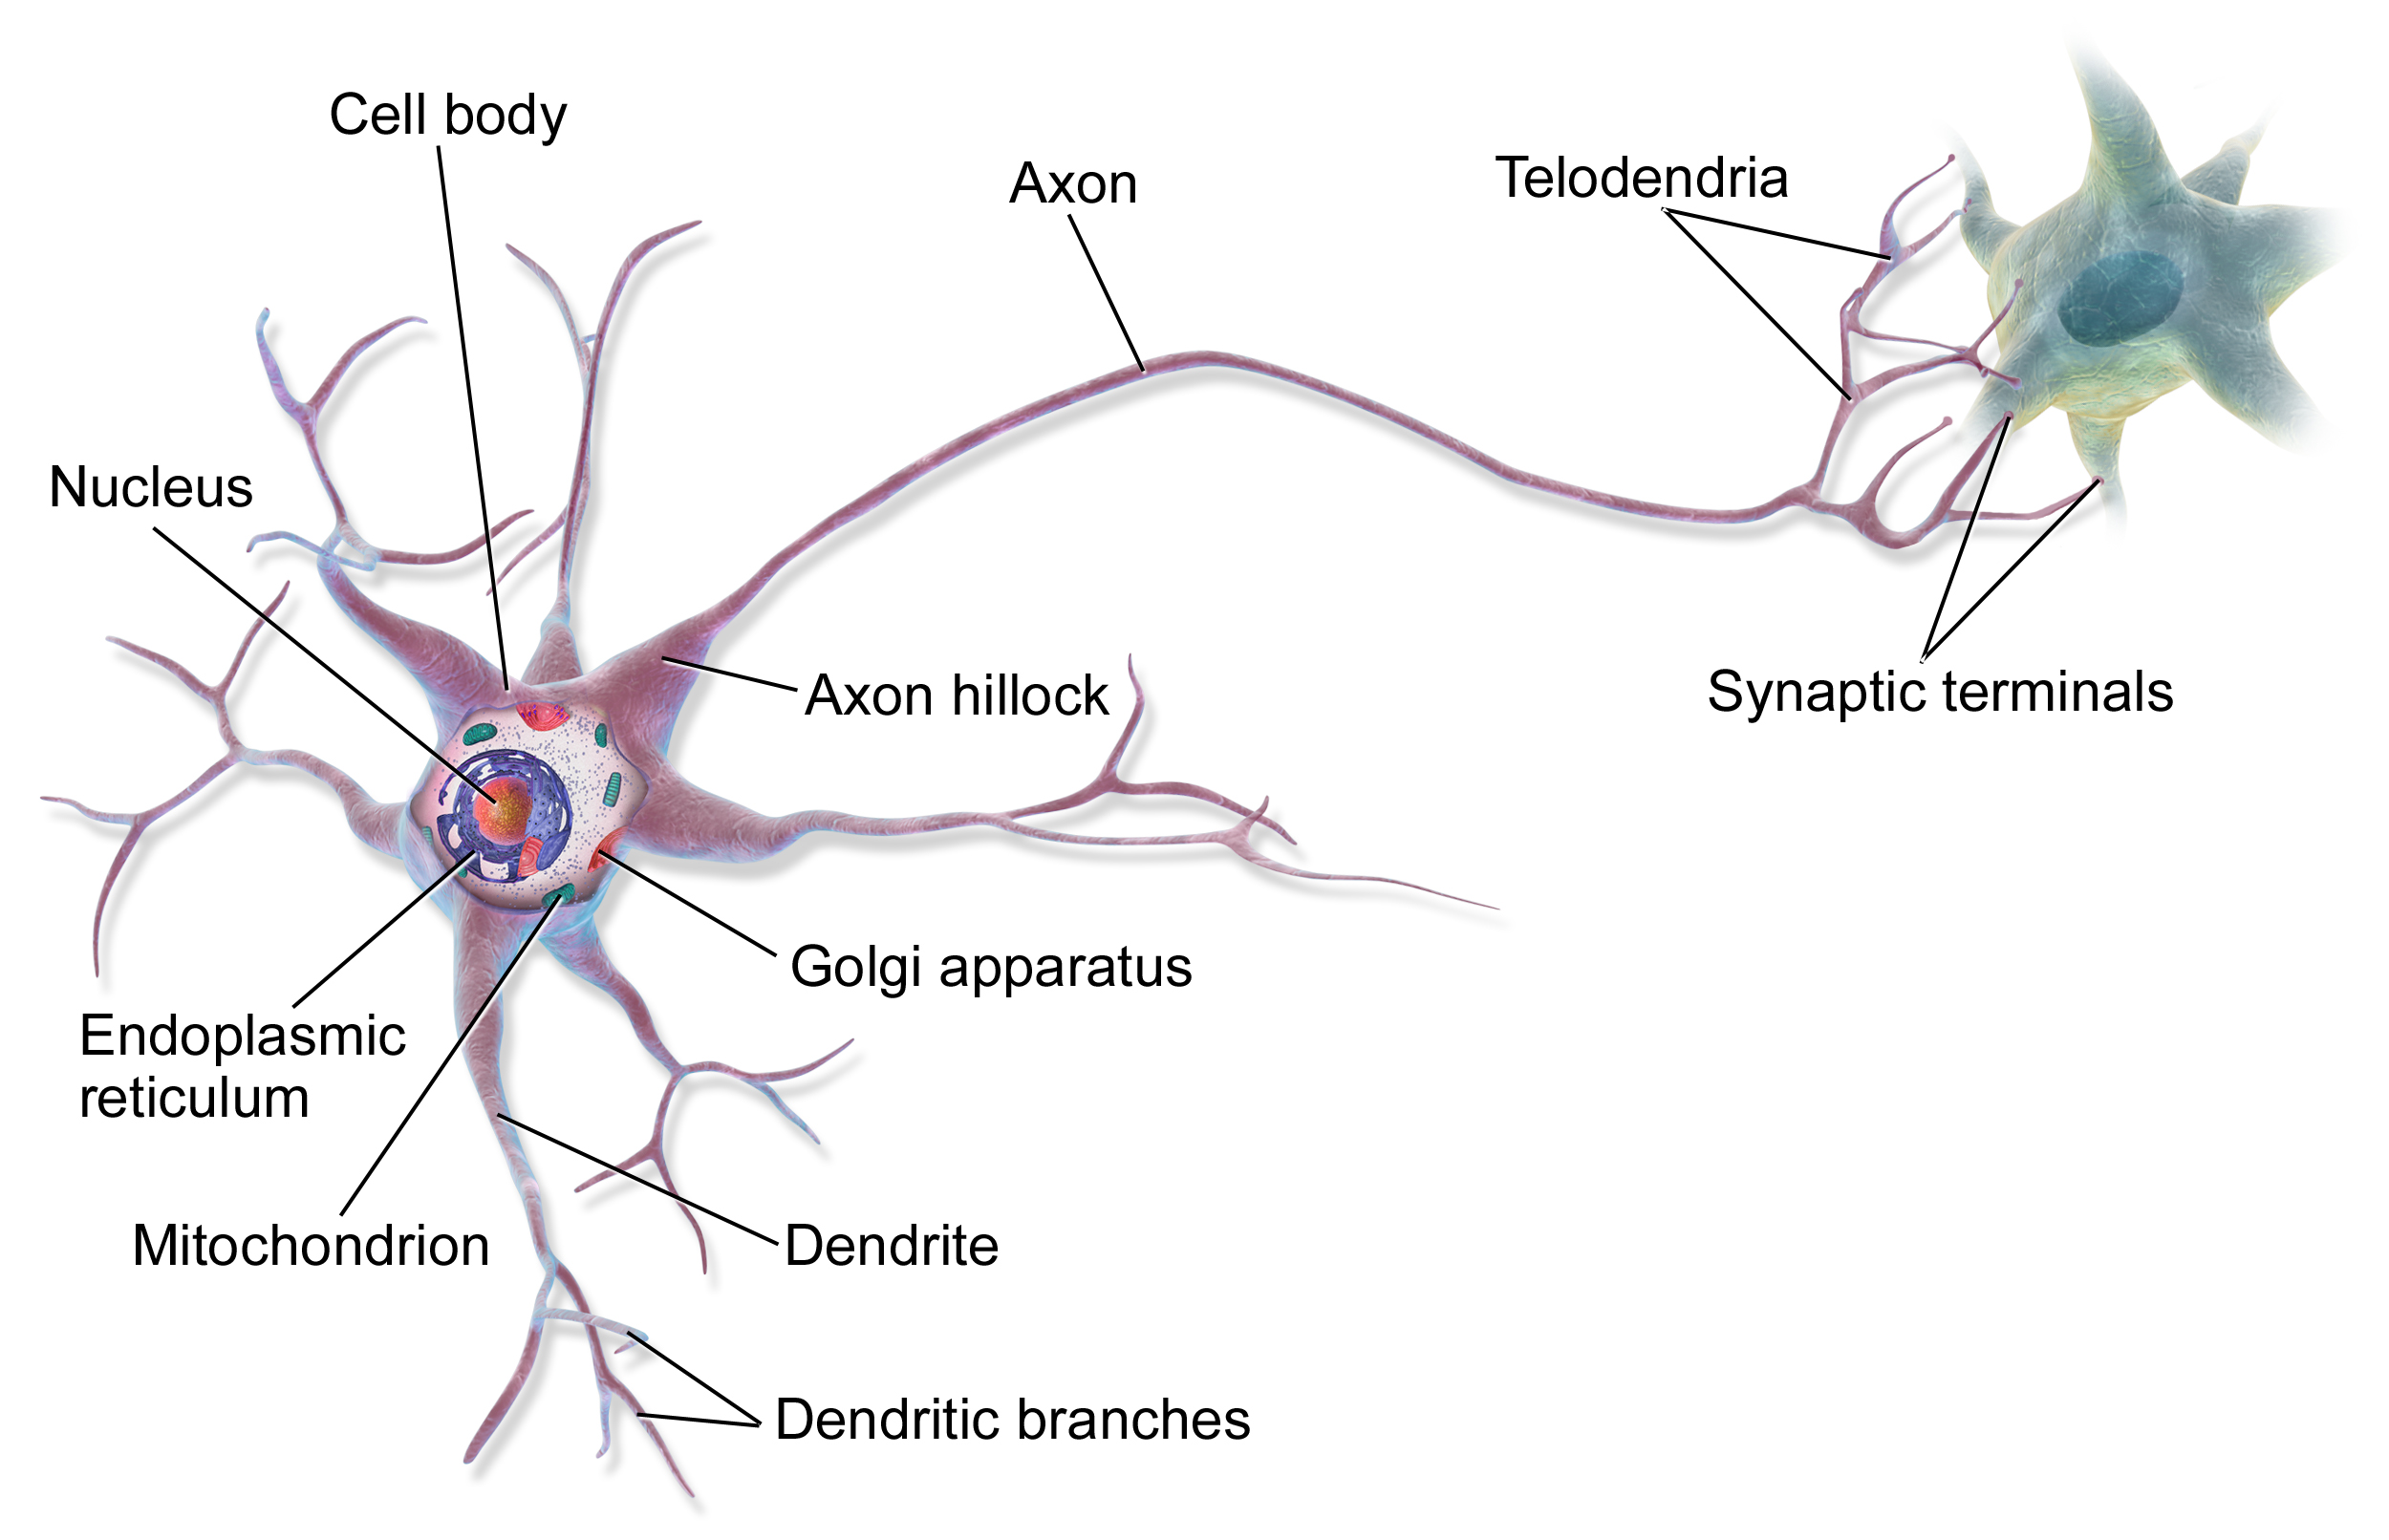

In [1]:
from IPython.display import Image
Image("Blausen_0657_MultipolarNeuron.png")

Imagen de Bruce Blaus (Creative Commons 3.0 (https://creativecommons.org/licenses/by/3.0/)). Reproducida de https://en.wikipedia.org/wiki/Neuron.

Las neuronas biológicas producen pequeños impulsos eléctricos, los cuales viajan a lo largo de los axones y producen la sinapsis a través de la liberación de señales químicas llamdas **neurotransmisores**. Cuando una neurona recibe una cantidad suficiente de dichos neurotransmisores dispara a su vez su propio impulso eléctrico.

Inspirado en dicho comportamiento, McCulloch y Pitts propusieron un modelo muy simple que posteriormente derivó en lo que conocemos como una neurona **artificial**: esta contiene uno o más entradas binarias (on/off inputs) y una salida binaria (output). La neurona artificial activa su output cuando más una determinada cantidad de inputs son activados, con lo cual puede calcularse cualquier proposición lógica que se quiera.

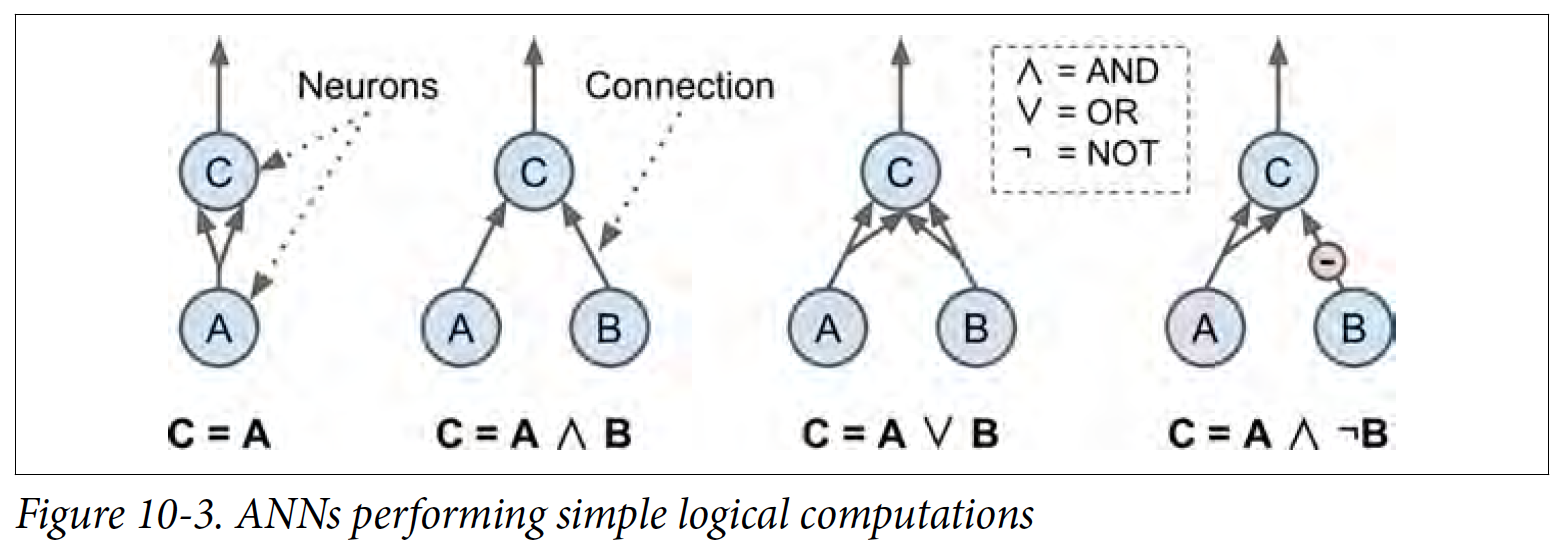

In [2]:
Image("ml-textbook-NN-logical-comp.png")

El **Perceptron** es una de las más simples arquitecturas ANN que existen y que fue inventada por Frank Rosenblatt en 1957, la cual se basa en una neurona artificial especial llamada Unidad de Lógica de Umbral (Threshold logic unit, **TLU**), en donde los inputs y outputs son números (en lugar de valores binarios on/off) y cada input está asociada a un peso (**weight**). La TLU procesa una suma ponderada de sus inputs y luego aplica una función de paso (**step functions**) a dicha suma y genera el output. Las entradas de un Perceptron son alimentadas alimentan a neuronas de paso llamadas neuronas de entrada. Todas las neuronas de entrada forman una capa de entrada (**input layer**).

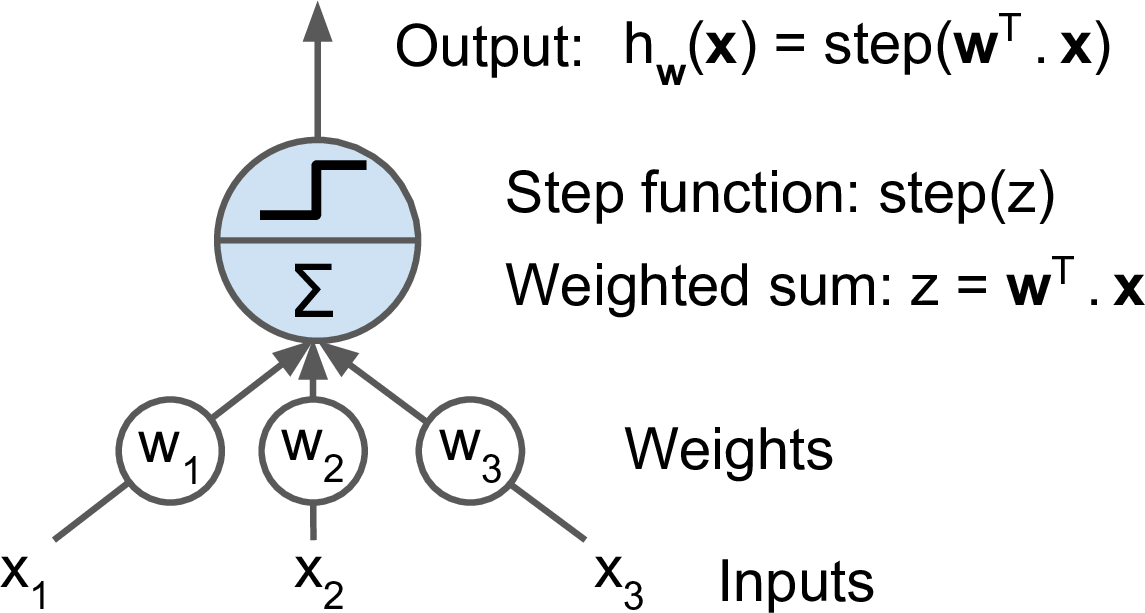

In [3]:
Image("threshold_logic_unit.png")

Una sola TLU puede ser utilizada como un sencillo clasificador lineal binario, en la cual calcula una combinación lineal de las entradas y, si el resultado excede un umbral, genera una la salida de clasificación positiva. 

Un Perceptron Multicapa (Multilayer Perceptron, **MLP**) está compuesto por una capa de entrada (**input layer**), una o más capas de TLU's llamadas capas ocultas(**hidden layer**) y una capa final de TLU's llamada capa de salida (**output layer**).

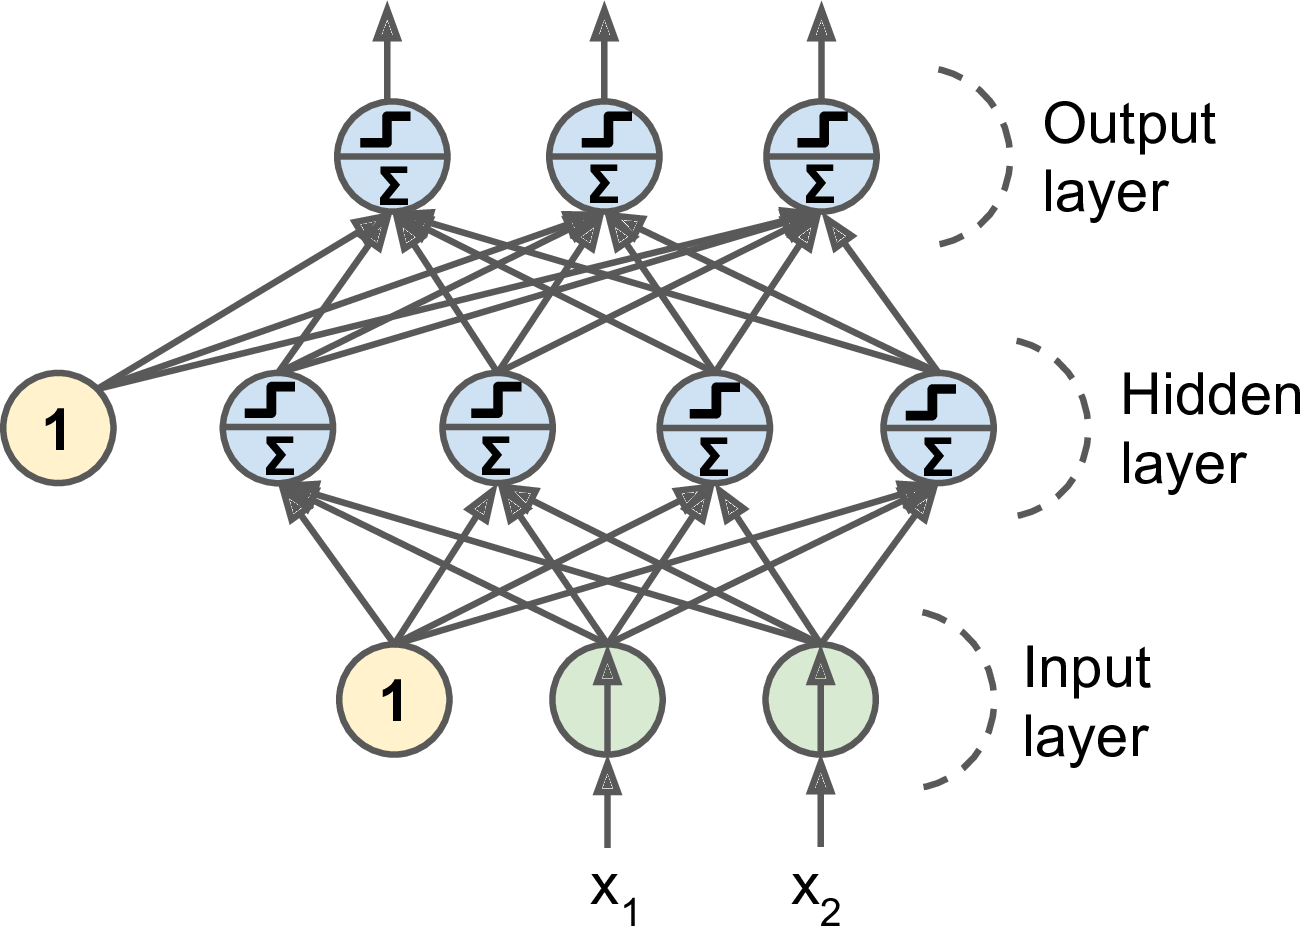

In [4]:
Image("architecture_MLP.png")

Las MLP's pueden ser utilizadas tanto para tareas de regresión como para clasificación. Por ejemplo, para problemas de clasificación binaria se requiere una única neurona de salida utilizando la función logística de activación: el output será un número entre 0 y 1, que se puede interpretar como la probabilidad estimada de una clasificación positiva.

_____
**Referencias:**

***Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron.*** 2019, second edition. Introduction to Artificial Neural Networks with Keras, pág. 279-330.

***Wikipedia (https://en.wikipedia.org/wiki/Neuron).
_____

Carga inicial de las librerías y funciones de formato

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from math import sqrt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import seaborn as sns

"""
import tensorflow
from tensorflow.keras import utils as np_utils
import keras
from keras.utils import np_utils
"""

#Funciones
def bold(t):
    """
    Funcion para formatear en negrita el texto.
    t = cualquier dato
    """
    return "\033[1m" + str(t) + "\033[0m"

def newline():
    """
    Funcion para imprimir cambio de linea
    """
    print("\r\n")
    
def titulo(t):
    """
    Funcion para imprimir titulo formateado.
    t = titulo
    """
    print(bold(t))
    print("----------------------------------------------")
    newline()
    

# 1. Carga y visualización de datos

Se procede con la carga de datos de estadísticas de videos Trending de videos de USA de Youtube.

In [6]:
df = pd.read_csv(r"USvideos.csv")

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [7]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

Una de las primeras tareas que debemos aplicar es la identificación de datos no numéricos (NaN)

In [8]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

Se dectectó que la columna "description" es la única que contiene NaN's pero es columna de texto y sin categorías que no agrega valor en el modelo de análisis de Machine Learning, por lo que se va a eliminar esta columna.

In [9]:
df.drop('description', axis='columns', inplace=True)
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed'],
      dtype='object')

El siguiente proceso a seguir es la eliminación de todas aquellas columnas que no representan datos numéricos o categorías y por lo tanto no son relevantes para el modelo de ML.

In [10]:
df = df.drop(columns = ['video_id','trending_date','title','channel_title','publish_time','tags','thumbnail_link'])
df.columns

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed'],
      dtype='object')

Seguidamente se debe hacer otra revisión de los datos para identificar que otro preprocesamiento de datos se requiere:

In [11]:
df

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,22,748374,57527,2966,15954,False,False,False
1,24,2418783,97185,6146,12703,False,False,False
2,23,3191434,146033,5339,8181,False,False,False
3,24,343168,10172,666,2146,False,False,False
4,24,2095731,132235,1989,17518,False,False,False
...,...,...,...,...,...,...,...,...
40944,15,1685609,38160,1385,2657,False,False,False
40945,22,1064798,60008,382,3936,False,False,False
40946,24,1066451,48068,1032,3992,False,False,False
40947,1,5660813,192957,2846,13088,False,False,False


Se nota que las últimas tres columnas muestran valores False y True que deben ser sustituidos por 0 y 1 respectivamente que son valores numéricos que si podemos utilizar en los algoritmos de ML.

In [12]:
df.replace(to_replace=False, value = 0, inplace = True)
df.replace(to_replace=True, value = 1, inplace = True)
df

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,22,748374,57527,2966,15954,0.0,0.0,0.0
1,24,2418783,97185,6146,12703,0.0,0.0,0.0
2,23,3191434,146033,5339,8181,0.0,0.0,0.0
3,24,343168,10172,666,2146,0.0,0.0,0.0
4,24,2095731,132235,1989,17518,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
40944,15,1685609,38160,1385,2657,0.0,0.0,0.0
40945,22,1064798,60008,382,3936,0.0,0.0,0.0
40946,24,1066451,48068,1032,3992,0.0,0.0,0.0
40947,1,5660813,192957,2846,13088,0.0,0.0,0.0


Una vez que la base de datos se ha depurado con los pasos anteriores se procede a aplicar técnicas de visualización de los datos.

Ploteo de Views versus Likes
----------------------------------------------




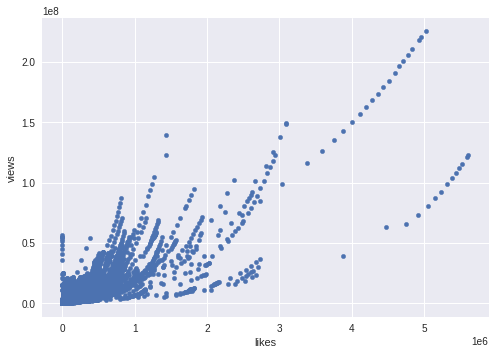

In [13]:
titulo("Ploteo de Views versus Likes")

matplotlib.style.use('seaborn')

df.plot.scatter(x='likes', y='views')


Basado en el gráfico de dispersión anterior podemos concluir que las variables de likes y Views presentan una alta correlación positiva.

Ploteo de Likes versus Dislikes
----------------------------------------------




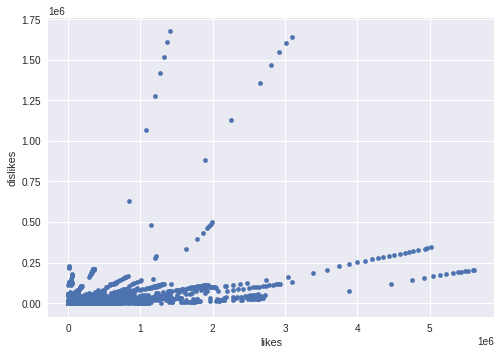

In [14]:
titulo("Ploteo de Likes versus Dislikes")

matplotlib.style.use('seaborn')

df.plot.scatter(x='likes', y='dislikes')


## Separacion de target y features

Antes de normalizar y estandarizar procedemos a separar features y target. Vamos a suponer que se quiere predecir si un video va a superar o no el record del millón de vistas, para lo cual vamos a incluir la siguiente columna en nuestro data set:

### Record
Esta columna es de tipo binomial, con valor igual a 1 si la cantidad de vistas ('views') es mayor o igual a 1 millón, y 0 si es menor.



In [15]:
# Creación de la columna de Record

df = df.assign(Record=1)

df['Record'] = np.where(df['views']>= 1000000 , 1, 0)

Además vamos a inclir dos nuevas característica a nuestro data (que se derivan de las características Likes, dislikes y comment_count) que vamos a llamar:

### FactorLD
Esta columna es el resultado de dividir los datos absolutos de Likes entre los Dislikes con lo cual se obtiene un factor de cuantas veces representan los likes con repecto a los dislikes para cada uno de los videos. La idea es contar con una referencia que no dependa directamente de la cantidad absoluta de likes y dislikes (pues estas van en función de la cantidad de views que es la variable sobre la que se base nuestra predicción) sino de la relación de aprobaciones versus desaprobaciones que muestra cada video.

In [16]:
# Primero se sustituyen los casos de 0 comentarios por un 1 para evitar que el factor se indefina (división por cero)

df[df['dislikes'] <= 0] = 1
df['dislikes']

0          2966
1          6146
2          5339
3           666
4          1989
          ...  
40944      1385
40945       382
40946      1032
40947      2846
40948    212976
Name: dislikes, Length: 40949, dtype: int64

In [17]:
# Creación de la columna de FactorLD 

factor = (df['likes'] / df['dislikes'])
factor.apply(np.floor)

df = df.assign(FactorLD=factor)

### FactorC
Aplicando el mismo razonamiento anterior, se requiere convertir la relación de la cantidad de comentarios (comment_count) con respecto al número de vistas (views), con lo cual obtendremos un factor relativo de los comentarios que llamaremos FactorC.

In [18]:
# Creación de la columna de FactorC 

factor = (df['comment_count'] / df['views'])
factor.apply(np.floor)

df = df.assign(FactorC=factor)

In [19]:
# Visualizamos nuestro set de datos:
df

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Record,FactorLD,FactorC
0,22,748374,57527,2966,15954,0.0,0.0,0.0,0,19.395482,0.021318
1,24,2418783,97185,6146,12703,0.0,0.0,0.0,1,15.812724,0.005252
2,23,3191434,146033,5339,8181,0.0,0.0,0.0,1,27.352126,0.002563
3,24,343168,10172,666,2146,0.0,0.0,0.0,0,15.273273,0.006253
4,24,2095731,132235,1989,17518,0.0,0.0,0.0,1,66.483157,0.008359
...,...,...,...,...,...,...,...,...,...,...,...
40944,15,1685609,38160,1385,2657,0.0,0.0,0.0,1,27.552347,0.001576
40945,22,1064798,60008,382,3936,0.0,0.0,0.0,1,157.089005,0.003696
40946,24,1066451,48068,1032,3992,0.0,0.0,0.0,1,46.577519,0.003743
40947,1,5660813,192957,2846,13088,0.0,0.0,0.0,1,67.799368,0.002312


Una vez realizada las modificación anteriores de nuestro data set estandarizado, ahora sí podemos proceder a la separación de nuestros features y target:

In [20]:
features = df[['FactorLD','FactorC','category_id']]

target = df[['Record']]

In [21]:
# Visualizamos nuestra features:

features

,FactorLD,FactorC,category_id
0,19.395482,0.021318,22
1,15.812724,0.005252,24
2,27.352126,0.002563,23
3,15.273273,0.006253,24
4,66.483157,0.008359,24
...,...,...,...
40944,27.552347,0.001576,15
40945,157.089005,0.003696,22
40946,46.577519,0.003743,24
40947,67.799368,0.002312,1


In [22]:
# Visualizamos nuestro target:

target

,Record
0,0
1,1
2,1
3,0
4,1
...,...
40944,1
40945,1
40946,1
40947,1


## Normalización y estandarización (Feature Scaling)

Una de las transformaciones más importantes que deben ser aplicadas a los datos es el escalamiento de características (feature scaling). En la mayoría de los casos, los algorítmos de aprendizaje automático no se desempeñan bien cuando la entrada de atributos numéricos presentan diferentes escalas. Existen dos formas comunes para conseguir que todos los datos de los atributos tengan la misma escala:

1. **Normalización (min-max scaling)**: es la más simple; los valores son cambiados y re-escalados de tal forma que se presenten en un rango de 0 a 1. Lo anterior se logra restando el valor mínimo y dividiendo por el máximo menos el mínimo. 

$$Scaler(x_i)=\frac{x_i-min(x)}{max(x) - min(x)}$$

      
2. **Estandarización:** La estandarización requiere primero restar el valor medio (mean value ${\mu}$), por lo tanto los valores estandarizados siempre presentan una media igual a cero, y después dividir por la desviación estandar (standard deviation ${\sigma}$), de tal forma que la distribución resultante presentará varianza igual a 1.


$$Scaler(x_i)=\frac{x_i-\mu}{\sigma}$$



_____
**Referencias:**

***Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron.*** 2019, second edition. Prepare the Data for Machine Learning Algorithms, Feature Scaling, pág. 69-70.

### Normalización y estandarización

In [23]:
titulo("Resultado de la normalización y estandarización")

scaler = MinMaxScaler()
nombreColumnas = features.columns.to_numpy()
datos = pd.DataFrame(scaler.fit_transform(features), columns = nombreColumnas)

print(datos)

Resultado de la normalización y estandarización
----------------------------------------------


       FactorLD   FactorC  category_id
0      0.011164  0.021318     0.500000
1      0.009102  0.005252     0.547619
2      0.015744  0.002563     0.523810
3      0.008791  0.006253     0.547619
4      0.038267  0.008359     0.547619
...         ...       ...          ...
40944  0.015859  0.001576     0.333333
40945  0.090420  0.003696     0.500000
40946  0.026810  0.003743     0.547619
40947  0.039025  0.002312     0.000000
40948  0.000965  0.014049     0.452381

[40949 rows x 3 columns]


Una vez normalizada y estandarizada la data procedemos a plotear de nuevo la información para poder comparar los resultados:

### Visualización de datos:

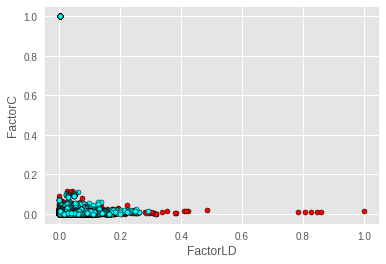

In [24]:
# Visualización de la relación del FactorLD y el FactorC con el target
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import numpy as np
def plot_points(df):
    X = np.array(datos[["FactorLD","FactorC"]])
    y = np.array(df["Record"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('FactorLD')
    plt.ylabel('FactorC')
plot_points(df)
plt.show()

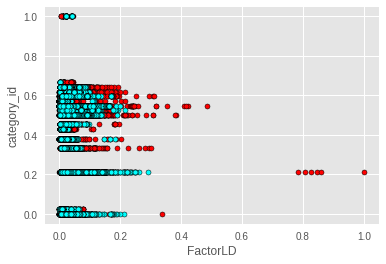

In [25]:
# Relación del FactorLD y la categoría de los videos con el target

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import numpy as np
def plot_points(df):
    X = np.array(datos[["FactorLD","category_id"]])
    y = np.array(df["Record"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('FactorLD')
    plt.ylabel('category_id')
plot_points(df)
plt.show()

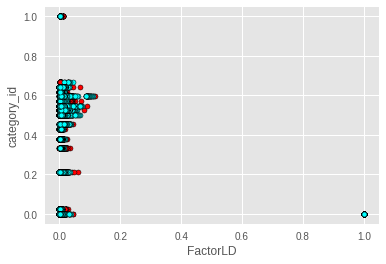

In [26]:
# Relación del FactorC y la categoría de los videos con el target

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import numpy as np
def plot_points(df):
    X = np.array(datos[["FactorC","category_id"]])
    y = np.array(df["Record"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('FactorLD')
    plt.ylabel('category_id')
plot_points(df)
plt.show()

# Aplicación del algoritmo de redes neuronales

Se utilizará el algoritmo de redes neuronales para predecir cuándo un video alcanza o no el record del millón de vistas basado en su set de atributos.

## Separación de datos de prueba y entrenamiento

Se procede a separar los datos de prueba y entrenamiento.

In [27]:
# Procedemos a realizar la redistribución de nuestros datos en los sets de entrenamiento y prueba:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=7)

titulo("Features")
print("Features Original", datos.shape)
print("Features Train", X_train.shape)
print("Features Test", X_test.shape)

newline()

titulo("Target")
print("Target Original", df['Record'].shape)
print("Target Train", y_train.shape)
print("Target Test", y_test.shape)

Features
----------------------------------------------


Features Original (40949, 3)
Features Train (30711, 3)
Features Test (10238, 3)


Target
----------------------------------------------


Target Original (40949,)
Target Train (30711, 1)
Target Test (10238, 1)


## Definición de la arquitectura de la red neuronal:


In [28]:
# Imports

# Para instalar keras con Conda (https://anaconda.org/conda-forge/keras)
# conda install -c conda-forge keras
# conda create -n tf tensorflow
# conda activate tf

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils as np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD # sustituye La línea anterior del ejercicio original que genera un error
from keras.utils import np_utils
#from keras.utils import to_categorical

# Building the model

model = Sequential()

model.add(Dense(128, input_dim=3))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
______________________________________________________

# Entrenamiento del modelo

In [29]:
# Training the model
model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
#model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

# 6. Score del modelo:

In [30]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

960/960 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5914

 Training Accuracy: 0.5913516283035278
320/320 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5967

 Testing Accuracy: 0.5966985821723938


# 7. Modificación de los parámetros del models.Sequencial!

- Activation function: relu and sigmoid
- Loss function: categorical_crossentropy, mean_squared_error
- Optimizer: rmsprop, adam, ada
- epochs? batches?

Un pequeño ejercicio agregando dropout...

In [31]:
model = Sequential()

model = Sequential()

model.add(Dense(128, input_dim=3))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               512       
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
____________________________________________________

In [32]:
# Training the model
#model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=0)

In [33]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

960/960 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4086

 Training Accuracy: 0.40864837169647217
320/320 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4033

 Testing Accuracy: 0.4033014178276062


# Conclusión

Al cambiar la función de activación de sigmoid a softmax vemos una desmejora en la métrica de Accuracy que pasa de 59.66% a 40.33%, por lo que, en este caso en particular, es mejor utilizar la función sigmoid para entrenar el modelo.